# Walmart sales data analysis

## Aim

To predict aggregate monthly sales using Regression models over Walmart dataset.

## Objectives
- Getting familiar with data analysis techniques
- Learning about prediction models/algoithms through experimentation
- Integrating a python backend to a compatible explorative GUI

## Methodology

- Step 0: Environment Setup
- Step 1: Preparing and reading data
- Step 2: Testing different prediction algorithms

In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ipywidgets import widgets
from IPython.display import display
from calendar import month_name
import sys

import os
current_dir = os.getcwd()
sys.path.insert(1, current_dir + "/project")

import algorithm.implementation_knn as knn_i
import algorithm.implementation_rf as rf
import algorithm.implementation_svr as svr
import algorithm.implementation_lr as lr
import utils.implementation_scaler as sc
%matplotlib inline

## Loading Data into dataframes

In [2]:
train = pd.read_csv("./data/train.csv")
#test = pd.read_csv("./data/test.csv")
stores = pd.read_csv("./data/stores.csv")
features = pd.read_csv("./data/features.csv")

## Exploring data

In [3]:
# finding length
print(len(features))

# finding dimentionality
features.shape

8190


(8190, 12)

**Total rows are 8190.**

**There are twelve columns.**

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


- Date is recognised as an "Object" by pandas.
- It means that it is not recognised as any pre-defined Python type

### Getting an overview of data

In [11]:
features.describe()
# Analysis and calculations regarding quantitative columns

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [12]:
# Including object
# Date column
features.describe(include=object)

,Date
count,8190
unique,182
top,2011-12-30
freq,45


In [13]:
# Including object
# Date column
features.describe(include=bool)

,IsHoliday
count,8190
unique,2
top,False
freq,7605


In [14]:
features.count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday       8190
dtype: int64

In [15]:
# Counting Null values
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
print(len(stores))
stores.isna().sum()

45


Store    0
Type     0
Size     0
dtype: int64

In [17]:
print(len(train))
train.isna().sum()

421570


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## Cleaning the data

In [18]:
for i in range(1, 6):
    features[f"MarkDown{i}"] = features[f"MarkDown{i}"].fillna(np.mean(features[f"MarkDown{i}"]))
# CPI and Unemployment will be substituted by mean
features["Unemployment"] = features["Unemployment"].fillna(np.mean(features["Unemployment"]))
features["CPI"] = features["CPI"].fillna(np.mean(features["CPI"]))

#knn_impute(target=features[''], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

In [19]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


In [20]:
print(len(pd.unique(features["Store"])))

45


In [21]:
print(len(pd.unique(train["IsHoliday"])))

2


In [22]:

main = train.merge(stores, on = "Store", how="left")
main = main.merge(features, on = ["Store", "Date"], how = "left")

# Convert Date object to Date format


# Sorting the dataframe by date

main = main.sort_values(by=["Date"])


main["Month"] = pd.to_datetime(main["Date"]).dt.month
main["Year"] = pd.to_datetime(main["Date"]).dt.year

main = main.sort_values(by=["Month", "Year"])


In [23]:
main.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,Year
166685,17,93,2011-01-07,6283.00,False,B,93188,6.23,2.891,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,127.191774,6.866,False,1,2011
110094,12,17,2011-01-07,10006.77,False,B,112238,37.64,3.287,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,127.191774,14.021,False,1,2011
23791,3,25,2011-01-07,2658.57,False,B,37392,53.35,2.976,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,214.695510,7.551,False,1,2011
391108,42,1,2011-01-07,8836.00,False,C,39690,43.43,3.287,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,127.191774,8.744,False,1,2011
248093,26,9,2011-01-07,9526.27,False,A,152513,21.13,3.193,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,132.882323,7.907,False,1,2011


In [24]:
# filling in missing values

#from knnimpute import optimistic
# Calculating missing mask for main["MarkDown1"]
#mm = []

#mm = main["MarkDown1"].apply(lambda e:True if e == None else False)
#type(main["MarkDown1"])
#main["MarkDown1"] = optimistic.knn_impute_optimistic(X = pd.core.series.Series(main["MarkDown1"]),missing_mask = mm ,k = 10)

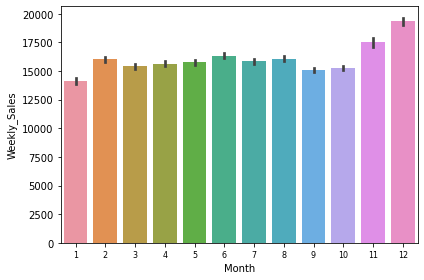

In [25]:
bar_plot = sns.barplot(x="Month", y="Weekly_Sales",  data=main)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

#bar_plot = sns.barplot(x="Type", y="Weekly_Sales",  data=main)
#bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)
#plt.tight_layout()
#plt.show()

In [26]:
len(main)

421570

In [27]:
# IsHoliday_x and IsHoliday_y are duplicates
main["IsHoliday"] = main["IsHoliday_y"]
main = main.drop(labels=["IsHoliday_y", "IsHoliday_x"], axis = 'columns')

# dropping MarkDown4
main = main.drop(labels=["MarkDown4"], axis = 'columns')

# Combining other MarkDowns into one
#main["MarkDown"] = main["MarkDown1"] + main["MarkDown2"] + main["MarkDown3"] + main["MarkDown5"]
#main = main.drop(labels=["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown5"], axis = 'columns')

<AxesSubplot:>

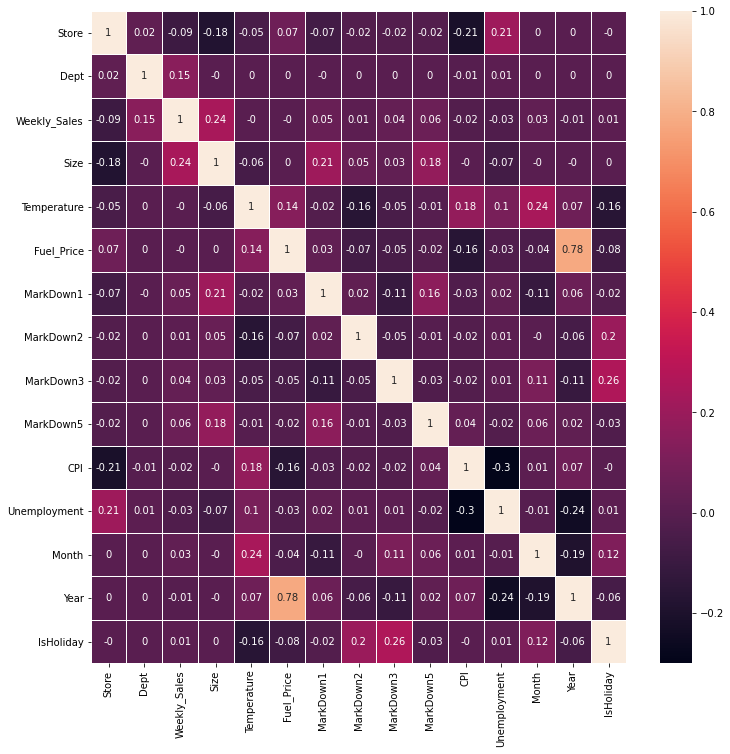

In [28]:
correlation_matrix = main.corr().round(2)

fig, axes = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=axes)

#### Observations

- **High positive correlation with Weekly_Sales**
  - Dept - .15
  - Size - .24
- **High negative correlation with Weekly_Sales**
  - NA

- MarkDown1 and MarkDown4 are highly correlated so only taking one of them should be sufficient. Also, summing up MarkDowns is a good idea.

## Preparing data for analysis

In [29]:
# Make a different dataframe for every month - or aggregate it
# Test rmse and r^2 for different models

In [30]:
main.tail()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Month,Year,IsHoliday
107237,11,94,2011-12-30,29340.71,A,207499,48.86,3.129,4241.32,58046.41,239.33,586.72,223.009084,7.197,12,2011,True
140486,15,18,2011-12-30,12439.07,B,123737,31.44,3.566,3248.40,31122.20,111.35,3474.84,136.643258,7.866,12,2011,True
101864,11,30,2011-12-30,5749.36,A,207499,48.86,3.129,4241.32,58046.41,239.33,586.72,223.009084,7.197,12,2011,True
350341,37,46,2011-12-30,6906.95,C,39910,48.26,3.129,373.92,1057.77,1.50,741.34,218.230236,7.716,12,2011,True
396257,42,82,2011-12-30,8245.06,C,39690,48.92,3.428,242.41,1447.26,3.64,459.06,130.071032,7.874,12,2011,True


In [31]:
# RF
# KNN
# DecisionTree

In [32]:
X = pd.DataFrame(np.c_[main['Dept'], main['Size']], columns = ['Dept','Size'])
Y = main['Weekly_Sales']

In [33]:
X_train, X_test, Y_train, Y_test = sc.split_data(X, Y)
print(type(Y))

<class 'pandas.core.series.Series'>


In [34]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {r2}")

The model performance for training set
--------------------------------------
RMSE is 21778.271768627164
R2 score is 0.08112353410040174


The model performance for testing set
--------------------------------------
RMSE is 21712.177485256183
R2 score is 0.08340963122288436


In [36]:
X_train, X_test = sc.standard(X_train, X_test)
y_pred = knn_i.prediction(X_train,Y_train, X_test, Y_test)

0.8874769187825601


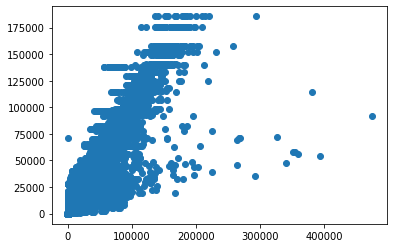

In [37]:
plt.scatter(Y_test, y_pred)
plt.show()

In [38]:

months = ['All','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

"""
month_dict = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
"""

toggle_buttons = widgets.ToggleButtons(
    options=['Monthly Prediction', 'Annual Prediction'],
    value='Monthly Prediction',
    description='Options',
    disabled=False,
    button_style='info',
    tooltips=['Predict monthwise sales', 'Predict sales on Annual basis']
)

toggle_buttons

ToggleButtons(button_style='info', description='Options', options=('Monthly Prediction', 'Annual Prediction'),…

In [39]:

month_select = widgets.Dropdown(options = months, value = 'January', description = 'Month', disabled = False)
if toggle_buttons.value == 'Annual Prediction':
    month_select.disabled = True
    month_select.value = 'All'
month_select

Dropdown(description='Month', index=1, options=('All', 'January', 'February', 'March', 'April', 'May', 'June',…

In [40]:
# Make dataframe according to the month that was selected
# if it was all, leave the df as it was

df = main
df.head()
# set the index to be this and don't drop

if not month_select.value == 'All':
    df.set_index(keys=['Month'], drop=False,inplace=True)
    df = df.loc[df.Month == months.index(month_select.value) + 1]
df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Month,Year,IsHoliday
Month,,,,,,,,,,,,,,,,,
2,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,4132.216422,211.096358,8.106,2,2010,False
2,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False


In [41]:
if month_select.value == 'All':
    bar_plot = sns.barplot(x="Month", y="Weekly_Sales",  data=df)
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)
    plt.tight_layout()
    plt.show()

## Running Models

# Splitting the data

In [42]:
models = ["KNN", "RandomForest", "DecisionTree"]

model_select = widgets.Dropdown(options = models, value = 'KNN', description = 'Algorithms', disabled = False)

model_select

Dropdown(description='Algorithms', options=('KNN', 'RandomForest', 'DecisionTree'), value='KNN')

In [43]:
df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Month,Year,IsHoliday
Month,,,,,,,,,,,,,,,,,
2,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,4132.216422,211.096358,8.106,2,2010,False
2,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False
2,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,7032.371786,3384.176594,1760.10018,4132.216422,131.527903,10.064,2,2010,False


In [44]:
X = pd.DataFrame(np.c_[#df['Store'],
                       df['Dept'],
                       df['Size'], 
                       #df['Temperature'],
                       #df['Fuel_Price'],
                       #df['CPI'],
                       #df['Unemployment'],
                       #df['Year'],
                       df['IsHoliday'],
                       df['MarkDown3'],
                       df['Type'],
                       df['Month']],
                 
                 columns = [#'Store',
                            'Dept',
                            'Size',
                            #'Temperature',
                            #'Fuel_Price',
                            #'CPI',
                            #'Unemployment',
                            #'Year',
                            'IsHoliday',
                            'MarkDown3',
                            'Type',
                            'Month'])
Y = df['Weekly_Sales']
t = pd.get_dummies(X.Type)
X = pd.concat([X, t], axis='columns')
X = X.drop(columns=['Type'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35526 entries, 0 to 35525
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dept       35526 non-null  object
 1   Size       35526 non-null  object
 2   IsHoliday  35526 non-null  object
 3   MarkDown3  35526 non-null  object
 4   Month      35526 non-null  object
 5   A          35526 non-null  uint8 
 6   B          35526 non-null  uint8 
 7   C          35526 non-null  uint8 
dtypes: object(5), uint8(3)
memory usage: 1.5+ MB


In [45]:
X_train, X_test, Y_train, Y_test = sc.split_data(X, Y)
print(type(Y))

<class 'pandas.core.series.Series'>


In [46]:
X_train, X_test = sc.standard(X_train, X_test)


0.702273586735378


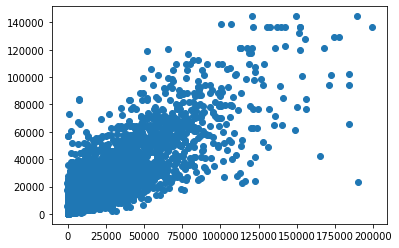

In [47]:
if(model_select.value == "KNN"):
    y_pred = knn_i.prediction(X_train,Y_train, X_test, Y_test)
elif (model_select.value == "RandomForest"):
    y_pred = rf.prediction(X_train,Y_train, X_test, Y_test)
elif (model_select.value == "DecisionTree"):
    y_pred = lr.prediction(X_train,Y_train, X_test, Y_test)

plt.scatter(Y_test, y_pred)

In [48]:
X.head()

,Dept,Size,IsHoliday,MarkDown3,Month,A,B,C
0,1,151315,False,1760.10018,2,1,0,0
1,5,93638,False,1760.10018,2,0,1,0
2,6,93638,False,1760.10018,2,0,1,0
3,7,93638,False,1760.10018,2,0,1,0
4,8,93638,False,1760.10018,2,0,1,0


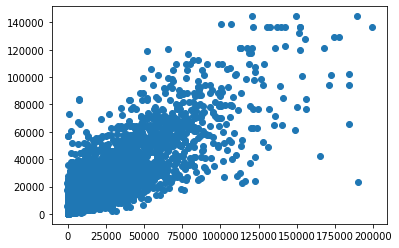

In [49]:
plt.scatter(Y_test, y_pred)

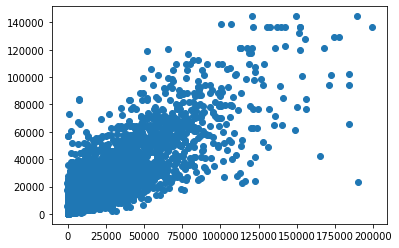

In [50]:
plt.scatter(Y_test, y_pred)